# Recognising Handwritten Digits on MNIST Dataset using KNN
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 25 inclusive.
  


The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

Each pixel column in the training set has a name like pixelx, where x is an integer between 0 and 783, inclusive. To locate this pixel on the image, suppose that we have decomposed x as x = i * 28 + j, where i and j are integers between 0 and 27, inclusive. Then pixelx is located on row i and column j of a 28 x 28 matrix, (indexing by zero).

For example, pixel31 indicates the pixel that is in the fourth column from the left, and the second row from.the top,

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('train.csv')

In [5]:
print(df.shape)

(42000, 785)


In [7]:
print(df.columns)

Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)


In [9]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
data = df.values #converting to numpy array

In [13]:
print(data.shape)

(42000, 785)


In [15]:
print(type(data))

<class 'numpy.ndarray'>


In [17]:
x = data[:,1:] #pixles
y = data[:,0] #labels

In [19]:
print(x.shape,y.shape)

(42000, 784) (42000,)


In [21]:
print(x)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [23]:
print(y)

[1 0 1 ... 7 6 9]


# Splitting Training and Testing

In [26]:
# train test split : apply 80 20 percent rule
split = int(0.8*x.shape[0])

In [28]:
split

33600

In [30]:
x_train = x[:split,:]
y_train = y[:split]

In [32]:
x_test = x[split:,:]
y_test = y[split:]

In [34]:
print(x_train.shape, y_train.shape)

(33600, 784) (33600,)


In [36]:
print(x_test.shape, y_test.shape)

(8400, 784) (8400,)


# Visualisation some samples
- Image is in BGR format
- have to change it to grayscale image : cmap function is there in matplot

In [39]:
def drawImage(sample):

    #reshape that image as image training dataset is flattened
    img = sample.reshape((28,28))
    plt.imshow(img, cmap = 'gray')
    plt.show()

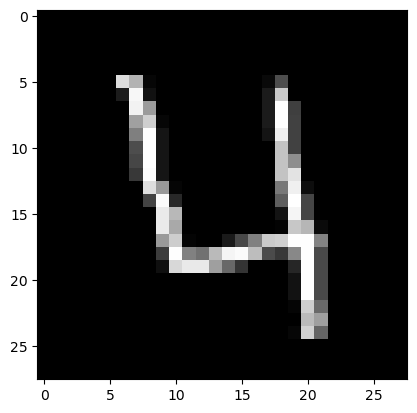

4


In [41]:
drawImage(x_train[3])
print(y_train[3]) #have to get this for testing as well

# we have to apply KNN

In [81]:
# Distance formula between two numpy arrays - euclidean distance
def distance(x1,x2):
    return np.sqrt(sum((x1-x2)**2))

def knn(x,y, querypoint, k=5):

    # Pick K Nearest Neighbours
    vals = []
    #for every point in the x
    for i in range(x.shape[0]):

        #compute distance
        d = distance(querypoint, x[i]) #distance between querypoint which has dim(1,784) from testing data and x[i] which will be from training set
        vals.append((d, y[i])) #appended distance and labels

    #print(vals)

    # 2. sort the array and find k nearest points
    vals = sorted(vals)
    #print(vals)
    vals = vals[:k] #first k points
    #print(vals)

    # majority vote

    vals = np.array(vals)
    new_values = np.unique(vals[:,1], return_counts=True)
    #print(new_values)
   # output for knn(x,y,[2,3]) --> (array([0., 1.]), array([3, 2], dtype=int64)) 0,1 is class and 3,2 is showing freq of class 0 and 1
    #index of the maximum count
    index = new_values[1].argmax() #argmax will give index of maximum count i.e., index of 3 in array([3, 2] is 0
    
    # map this index with my data
    pred = new_values[0][index]

    return pred


In [80]:
# make predictions over test images
pred = knn(x_train,y_train,x_test)

In [60]:
pred

8.0

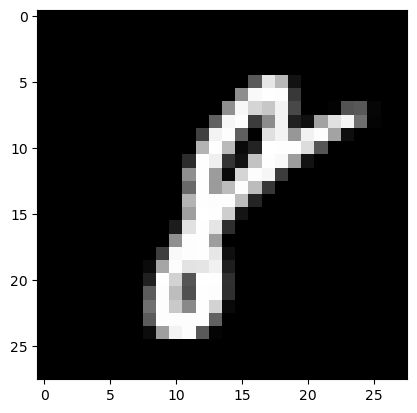

In [62]:
drawImage(x_test[25])

In [64]:
print(y_test[25])

8


# Task 
## find accuracy of this project
# To find the accuracy of your K-Nearest Neighbors (KNN) implementation, you can compare the predicted class labels of the test data points to their true class labels. The accuracy is the percentage of correctly predicted labels out of the total number of predictions.

In [ ]:
pred=[]
for i in range(x_test.shape[0]):
    pred.append(knn(x_train,y_train,x_test[i]))

pred = np.arrray(pred)

In [76]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(pred, y_test)
print(f'Accuracy: {accuracy * 100:.2f}%')

Accuracy: 95.96%
